MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: 

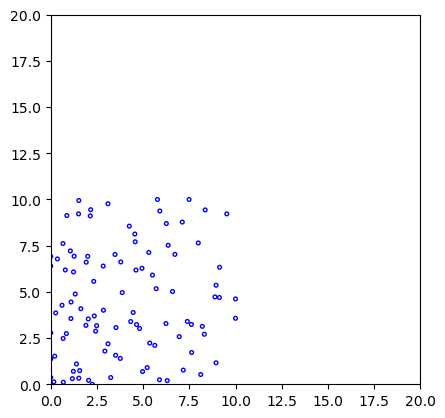

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import glob
from matplotlib.patches import Circle

# Get all configurations from the confs folder
files = glob.glob("../confs/c*")
# sort them in ascending order
filenames = sorted(files, key=lambda x: int(x.split("\conf")[1]))

# Create a new figure
fig, ax = plt.subplots()
ax.set(xlim=(0, 20), ylim=(0, 20), aspect='equal')

# List to hold the circle patches (assume number of circles remains constant)
circles = []

# Initialize the first frame
data = np.loadtxt(filenames[0], skiprows=2, usecols=[1,2,3])
for x, y, r in data:
    circle = Circle((x, y), r, edgecolor='b', facecolor='none')
    circles.append(circle)
    ax.add_patch(circle)

# Reccurent update of the figure 
def update(frame):
    # Load new data for the frame
    data = np.loadtxt(filenames[frame], skiprows=2, usecols=[1,2,3])
    for patch, (x, y, r) in zip(circles, data):
        # Update circle position and radius
        patch.center = (x, y)
        patch.set_radius(r)
    return circles

ani = FuncAnimation(fig, update, frames=len(filenames), blit=True, interval=50)

ani.save("../output/animation")

plt.show()
